In [74]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
state = np.random.RandomState(12345)

# ЗАДАЧА:
Мы немного поменяли интерфейс интернет-магазина для части пользователей. Нужно проверить, изменился ли средний чек покупки.  (Предполагается, что пользователей группы А и группы B выбирали случайным образом.)

In [53]:
alpha = 0.05 # зададим уровень значимости (единый для всех методов)

Сразу следует отметить, что такое P-value.
- Нулевая гипотеза предполагает, что средние двух выборок одинаковые (то, что метод mean() нам говорит об обратном нам не важно, согласно ЦПТ считается, что средние подвыборок распределены нормально вокруг истинного среднего, т.е. это просто одно из отклонений)
- P-value показывает вероятность получить такое или более экстремальное значение, т.е. разницу средних из двух случайных выборок.

In [54]:
# данные контрольной группы A
samples_A = pd.Series([
     98.24,  97.77,  95.56,  99.49, 101.4 , 105.35,  95.83,  93.02,
    101.37,  95.66,  98.34, 100.75, 104.93,  97.  ,  95.46, 100.03,
    102.34,  98.23,  97.05,  97.76,  98.63,  98.82,  99.51,  99.31,
     98.58,  96.84,  93.71, 101.38, 100.6 , 103.68, 104.78, 101.51,
    100.89, 102.27,  99.87,  94.83,  95.95, 105.2 ,  97.  ,  95.54,
     98.38,  99.81, 103.34, 101.14, 102.19,  94.77,  94.74,  99.56,
    102.  , 100.95, 102.19, 103.75, 103.65,  95.07, 103.53, 100.42,
     98.09,  94.86, 101.47, 103.07, 100.15, 100.32, 100.89, 101.23,
     95.95, 103.69, 100.09,  96.28,  96.11,  97.63,  99.45, 100.81,
    102.18,  94.92,  98.89, 101.48, 101.29,  94.43, 101.55,  95.85,
    100.16,  97.49, 105.17, 104.83, 101.9 , 100.56, 104.91,  94.17,
    103.48, 100.55, 102.66, 100.62,  96.93, 102.67, 101.27,  98.56,
    102.41, 100.69,  99.67, 100.99])
# данные экспериментальной группы B
samples_B = pd.Series([
    101.67, 102.27,  97.01, 103.46, 100.76, 101.19,  99.11,  97.59,
    101.01, 101.45,  94.8 , 101.55,  96.38,  99.03, 102.83,  97.32,
     98.25,  97.17, 101.1 , 102.57, 104.59, 105.63,  98.93, 103.87,
     98.48, 101.14, 102.24,  98.55, 105.61, 100.06,  99.  , 102.53,
    101.56, 102.68, 103.26,  96.62,  99.48, 107.6 ,  99.87, 103.58,
    105.05, 105.69,  94.52,  99.51,  99.81,  99.44,  97.35, 102.97,
     99.77,  99.59, 102.12, 104.29,  98.31,  98.83,  96.83,  99.2 ,
     97.88, 102.34, 102.04,  99.88,  99.69, 103.43, 100.71,  92.71,
     99.99,  99.39,  99.19,  99.29, 100.34, 101.08, 100.29,  93.83,
    103.63,  98.88, 105.36, 101.82, 100.86, 100.75,  99.4 ,  95.37,
    107.96,  97.69, 102.17,  99.41,  98.97,  97.96,  98.31,  97.09,
    103.92, 100.98, 102.76,  98.24,  97.  ,  98.99, 103.54,  99.72,
    101.62, 100.62, 102.79, 104.19])

### С помощью пакета Scipy stats.ttest
Самый легкий способ, которым и есть смысл пользоваться
- Следует отметить, что здесь мы получаем двухстороннюю вероятность, т.е. экстремальные значения могут быть как отрицательные, так и положительные. 
- Если бы мы делали одностороннюю проверку, то полученное значение надо бы было разделить на два. При этом, и уровень alpha надо было бы уменьшить в два раза.

In [55]:
t, pvalue = stats.ttest_ind(samples_A, samples_B) #считаем, что дисперсии выборок одинаковые equal_var = True
pvalue

0.06891039185573565

In [56]:
if pvalue > alpha: # т.е. вероятность получить abs(samples_A, samples_B) случайным способом
                   #больше установленного нами порога
    print("Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился")
else:
    print("Отвергаем нулевую гипотезу: скорее всего, средний чек увеличился")

Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился


Отметим, что с вероятностью 6.9% мы можем получить такую же или более существенною разницу средних делая подвыборки из Генеральной совокупности с данными характеристиками (t-критерий, дисперсия). 

### С помощью stats.t.cdf (кумулятивного распределения Стьюдента)

В классической статистике, рассчитав t-критерий Стюдента и количество степеней свободы, с помощью специальной таблицы, можно найти pvalue. В нашем случае, роль этой таблицы будет выполнять метод stats.t.cdf

In [61]:
# считаем среднее стандартное отклонение по двум выборкам
s = np.sqrt( (samples_A.var(ddof=1) + samples_B.var(ddof=1)) / 2 )
s

2.969996248679739

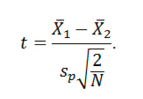

In [63]:
#считаем t-критерий Стьюдента, где N - размер одной из выборок (в случае равных выборок)
t = (samples_A.mean() - samples_B.mean()) / (s * np.sqrt(2.0/len(samples_A)))
t

-1.8289566175344534

In [65]:
# количество степеней свободы
df = 2*(len(samples_A)) - 2
df

198

In [67]:
# находим p-значение:
pvalueT = 2*(1 - stats.t.cdf(np.abs(t), df=df)) # фактически, мы считаем вероятность интервала справа, 
#потом умножаем его на 2.
pvalueT

0.06891039185573566

In [68]:
if pvalueT > alpha:
    print("Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился")
else:
    print("Отвергаем нулевую гипотезу: скорее всего, средний чек увеличился")

Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился


### Bootstrap
Смысл метода в том, что мы считает разницу между средними двух выборок. Затем объединяем выборки в одну, перемешиваем значения, снова разбиваем на две выборки и считаем разницу средних (B-A). Если разница больше изначальной(смотрим по модулю), то отмечаем этот факт. В конце эксперимента делим количество таких превышений на число экспериментов - это и будет наша p-value

In [57]:
# посчитаем фактическую разность средних значений в группах
AB_difference = samples_B.mean() - samples_A.mean()
AB_difference

0.7682000000000357

In [58]:
# зададим число экспериментов
bootstrap_samples = 10000
#объединим выборки
united_samples = pd.concat([samples_A, samples_B]) 

In [69]:
count = 0
bootstrap =[]
for i in range(bootstrap_samples):
    subsample = united_samples.sample(n=len(united_samples), replace=True, random_state=state)
    subsample_A = subsample[:len(samples_A)]
    subsample_B = subsample[len(samples_A):]
    # разница средних
    bootstrap_difference = subsample_B.mean() - subsample_A.mean()
    bootstrap.append(bootstrap_difference)
    if abs(bootstrap_difference) >= AB_difference:
        count += 1
# p-value равно доле превышений значений
pvalueBS = count / bootstrap_samples
pvalueBS

0.0675

In [70]:
# Если случаев, когда bootstrap_difference >= AB_difference действительно много, мы понимаем, что с большой вероятностью,
# разность объясняется свойствами выборки, а не действительным ростом среднего чека
if pvalueBS > alpha:
    print("Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился")
else:
    print("Отвергаем нулевую гипотезу: скорее всего, средний чек увеличился")

Не получилось отвергнуть нулевую гипотезу: скорее всего, средний чек не увеличился


Хотелось отметить, что с помощью техники Bootstrap (фактически - метод Монте-Карло), мы получили абсолютно такое же значение P-value без специальных знаний.

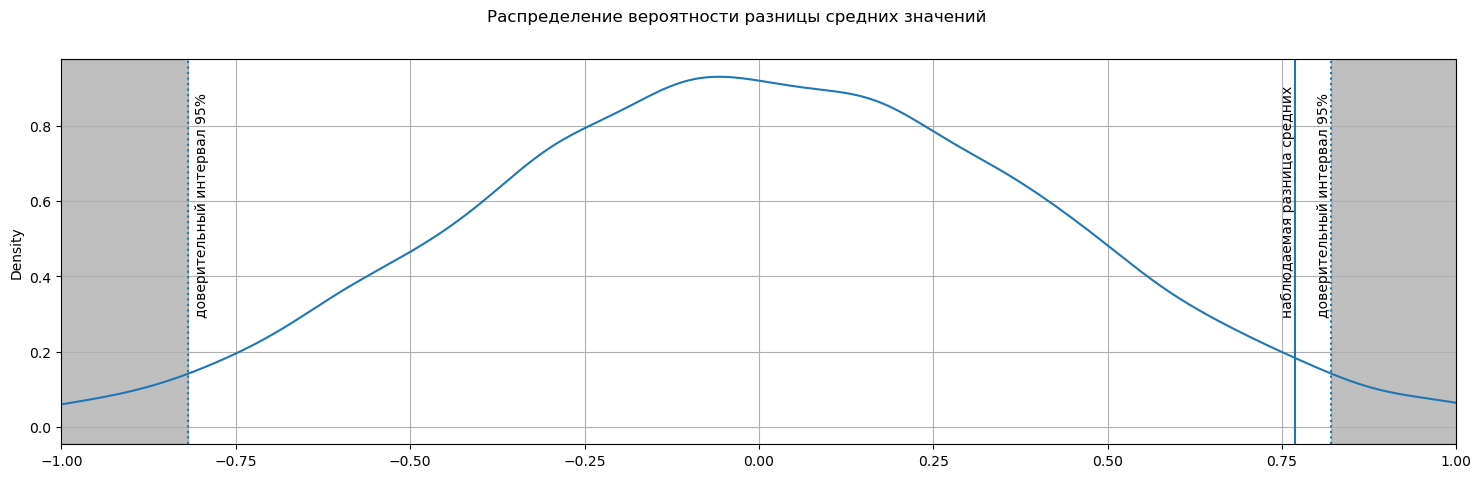

In [95]:
bootstrap = pd.Series(bootstrap)
fig, ax = plt.subplots(figsize=(18, 5))
bootstrap.plot(kind='kde', grid=True, ax=ax)
plt.axvline(bootstrap.quantile(0.025), linestyle='dotted')
plt.text(bootstrap.quantile(0.025)+0.01, 0.3, 'доверительный интервал 95%', rotation=90)

plt.axvline(bootstrap.quantile(0.975), linestyle='dotted')
plt.text(bootstrap.quantile(0.975)-0.02, 0.3, 'доверительный интервал 95%', rotation=90)
plt.suptitle('Распределение вероятности разницы средних значений')
plt.xlim(-1, 1)
plt.axvspan(-200, bootstrap.quantile(0.025), color='grey', alpha=0.5)
plt.axvspan(bootstrap.quantile(0.975),1000, color='grey', alpha=0.5)

plt.axvline(AB_difference)
plt.text(AB_difference-0.02, 0.3, 'наблюдаемая разница средних', rotation=90)

plt.show()

Графически решение можно представить таким образом:
- У нас есть распределение средних(==Стьюдента) и есть доверительный интервал 95% (от альфа = 0.05)
- Если наше среднее попадает в 95% значений доверительного интервала, значит считаем, что природа этого различия - случайность выборок, в нашем случае это так и есть.